In [19]:
import pandas as pd
import numpy as np
import random
from datetime import date
import geopandas as gpd
import os

from PIL import Image
from matplotlib.patches import ConnectionPatch
from IPython.display import Image
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.patches as mpatches
from shapely.geometry import mapping
import matplotlib.colors as mcolors

import pygris
from pygris import tracts
from pygris import block_groups
from pygris import primary_secondary_roads
from pygris import school_districts
from pygris import counties
from pygris.geocode import geocode

from census import Census
# Builing a Compartmetal Model

from sympy import Max, parse_expr
from sympy import symbols, Matrix

from epymorph import *
from epymorph.compartment_model import *

# Runing the Simulation
from functools import partial


import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame, GeoSeries

# Building a geo
from typing import cast

from epymorph.data_shape import Shapes

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch
import imageio
import os

In [26]:
from pygris import block_groups
from pygris.data import get_lodes
import matplotlib.pyplot as plt

az_lodes_od = get_lodes(state="AZ", year=2019, lodes_type="od", cache=True)

az_lodes_od.head()


,index,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03
0,0,040019426002012,040179424001125,1,0,1,0,0,1,0,0,0,1
1,1,040019426002012,040179425002000,1,0,1,0,0,1,0,0,0,1
2,2,040019426002012,040179425002017,1,1,0,0,1,0,0,0,0,1
3,3,040019426002012,040179425003026,1,0,1,0,0,1,0,0,0,1
4,4,040019427001045,040019427002104,1,0,0,1,0,0,1,0,1,0


In [16]:
apple = (
    az_lodes_od.assign(
        w_tract=az_lodes_od["w_geocode"].str.slice(stop=11),
        h_tract=az_lodes_od["h_geocode"].str.slice(stop=11),
    )
    .query('w_tract == "06085508102"')
    .groupby("h_tract", as_index=False)
    .agg({"S000": sum})
    .rename({"S000": "apple_workers"}, axis=1)
)

apple.head()

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_3051/3127426238.py:7: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'S000': sum})


,h_tract,apple_workers
0,06001400100,3
1,06001400200,3
2,06001400300,3
3,06001400400,2
4,06001400500,4


In [17]:
apple_commuters = (
    az_lodes_od.assign(h_tract=az_lodes_od["h_geocode"].str.slice(stop=11))
    .groupby("h_tract", as_index=False)
    .agg({"S000": sum})
    .rename({"S000": "total_workers"}, axis=1)
    .merge(apple, on="h_tract")
    .assign(apple_per_1000=lambda x: 1000 * (x["apple_workers"] / x["total_workers"]))
)

apple_commuters.head()

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_3051/2954322252.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'S000': sum})


,h_tract,total_workers,apple_workers,apple_per_1000
0,06001400100,1412,3,2.124646
1,06001400200,1088,3,2.757353
2,06001400300,2654,3,1.130369
3,06001400400,2369,2,0.844238
4,06001400500,2152,4,1.858736


Using FIPS code '06' for input 'CA'
Using FIPS code '075' for input 'San Francisco'
Using FIPS code '001' for input 'Alameda'
Using FIPS code '081' for input 'San Mateo'
Using FIPS code '085' for input 'Santa Clara'
Using FIPS code '041' for input 'Marin'
Using FIPS code '013' for input 'Contra Costa'


<Axes: >

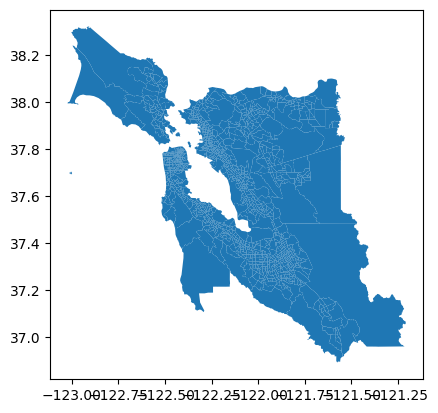

In [36]:
bay_tracts = tracts(
    state="CA",
    cb=True,
    county=[
        "San Francisco",
        "Alameda",
        "San Mateo",
        "Santa Clara",
        "Marin",
        "Contra Costa",
    ],
    year=2019,
    cache=True,
)

bay_tracts.plot()

ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

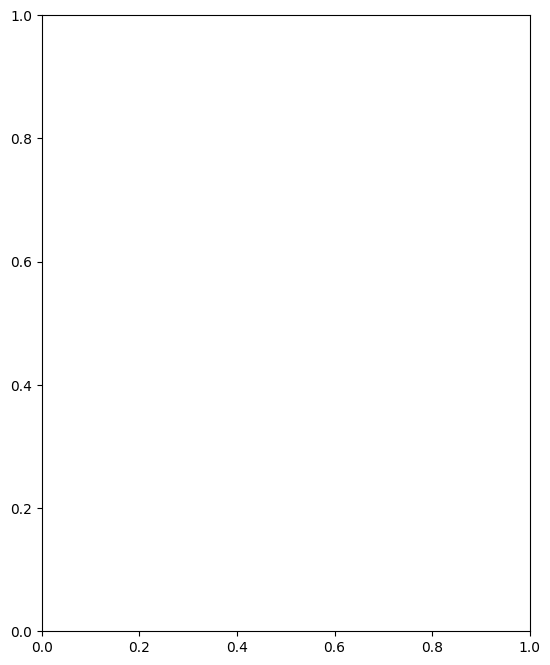

In [37]:
apple_bay = bay_tracts.merge(
    apple_commuters, left_on="GEOID", right_on="h_tract", how="left"
)

apple_bay.fillna(0, inplace=True)

apple_bay.plot(
    column="apple_per_1000",
    legend=True,
    cmap="cividis",
    figsize=(8, 8),
    k=7,
    scheme="naturalbreaks",
    legend_kwds={"loc": "lower left"},
)

plt.title(
    "Apple-area commuters (rate per 1000 total commuters)\n2019 LODES data, Bay Area Census tracts",
    fontsize=12,
)

ax = plt.gca()

ax.set_axis_off()

In [ ]:
bay_tracts = tracts(
    state="CA",
    cb=True,
    county=[
        "San Francisco",
        "Alameda",
        "San Mateo",
        "Santa Clara",
        "Marin",
        "Contra Costa",
    ],
    year=2019,
    cache=True,
)

bay_tracts.plot()

In [15]:
from pygris import block_groups

block_groups

<function pygris.enumeration_units.block_groups(state=None, county=None, cb=False, year=None, cache=False, subset_by=None)>

In [25]:
STATE = "AZ"
COUNTY = "Maricopa"
YEAR = 2019
census_block_groups = block_groups(state=STATE, county=COUNTY, year=YEAR, cache=True)

Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


In [28]:
from pygris import block_groups
from pygris.data import get_lodes
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pull AZ OD flows (as before)
az_lodes = get_lodes(state="AZ", year=2019, lodes_type="od", cache=True)

# 2. Derive block‐group codes by slicing the first 12 digits of the 15‑digit geocode
az_lodes = az_lodes.assign(
    w_bg=az_lodes["w_geocode"].str.slice(stop=12),  # workplace block‐group
    h_bg=az_lodes["h_geocode"].str.slice(stop=12),  # home      block‐group
)

# 3. Find the block‑group with the highest total jobs (S000) in Maricopa (county FIPS “013”)
bg_totals = (
    az_lodes.query("w_bg.str.startswith('04013')")  # limit to Maricopa County
    .groupby("w_bg", as_index=False)["S000"]
    .sum()
    .rename(columns={"S000": "total_jobs"})
    .sort_values("total_jobs", ascending=False)
)

print(bg_totals.head(5))


              w_bg  total_jobs
1222  040131141001       50870
1665  040133197101       48234
2322  040136147001       25849
1214  040131138006       25389
1707  040133201001       21269


In [31]:
top_bg = bg_totals.iloc[0]["w_bg"]

flows_to_top = (
    az_lodes.query("w_bg == @top_bg")
    .groupby("h_bg", as_index=False)["S000"]
    .sum()
    .rename(columns={"S000": "workers_to_top_bg"})
)

flows_to_top.head()

,h_bg,workers_to_top_bg
0,040019440002,1
1,040019442011,1
2,040019442022,1
3,040019442023,1
4,040019450013,1


Using FIPS code '04' for input 'AZ'


ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

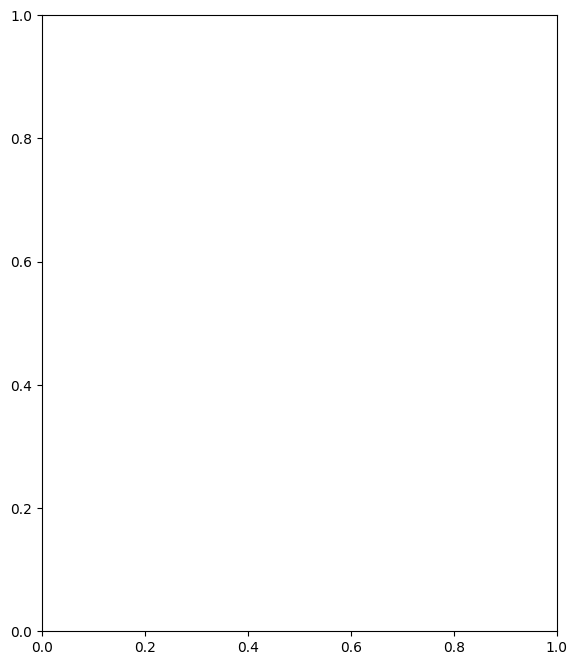

In [34]:
# 4. Grab Maricopa block‐group geometries
maricopa_bgs = block_groups(state="AZ", county="013", year=2019, cache=True)

# 5. Merge on your home bg flows and plot
map_df = maricopa_bgs.merge(flows_to_top, left_on="GEOID", right_on="h_bg", how="left")
map_df["workers_to_top_bg"] = map_df["workers_to_top_bg"].fillna(0)

ax = map_df.plot(
    column="workers_to_top_bg",
    scheme="quantiles",
    cmap="OrRd",
    legend=True,
    figsize=(8, 8),
    edgecolor="gray",
    linewidth=0.2,
)
ax.set_title(f"Workers Commuting to Block‐Group {top_bg}", fontsize=14)
ax.axis("off")
plt.show()


# Movement GEO


In [ ]:
school_district = [
    "040134223021",
    "040134223042",
    "040134223053",
    "040134223072",
    "040138149002",
    "040138150003",
    "040138154001",
    "040134226411",
    "040134226412",
    "040134226422",
    "040134226431",
    "040134226432",
    "040134226441",
    "040138144002",
    "040134225092",
    "040134224011",
    "040138176001",
    "040134226061",
    "040134223082",
    "040134223083",
    "040134224021",
    "040134223093",
    "040134224033",
    "040138154003",
    "040134226171",
    "040134225093",
    "040134226213",
    "040134226222",
    "040134226231",
    "040134226232",
    "040138146001",
    "040134225072",
    "040134225103",
    "040134225112",
    "040134225122",
    "040134226062",
    "040134226063",
    "040134226173",
    "040134226201",
]

In [55]:
geo_df = geo_library["maricopa_cbg_2019"]().values
geo_df = pd.DataFrame({k: list(v) for k, v in geo_df.items()})

school_district = ["040134226062"]
# Assuming geo_df and school_district are defined as per your initial setup
geo_df["population"] = geo_df["population_by_age"].apply(lambda x: x[0])

geo_df["population"] = geo_df.apply(
    lambda row: 0 if row["geoid"] not in school_district else row["population"], axis=1
)
print(geo_df["population"].max())
geo_df.head()

732


,average_household_size,centroid,geoid,label,median_age,median_income,pop_density_km2,population,population_by_age,population_by_age_x6,tract_gini_index,tract_median_income
0,2.33,"[-111.77075643330394, 33.76924660709943]",040130101011,040130101011,50.5,99219,99.319999,0,"[358, 1155, 278]","[358, 110, 671, 374, 194, 84]",0.4423,99489
1,2.15,"[-111.72000671148204, 33.7410933260103]",040130101012,040130101012,63.9,127614,68.782398,0,"[162, 883, 962]","[162, 0, 423, 460, 559, 403]",0.4423,99489
2,1.83,"[-111.66697569766907, 33.72404113568911]",040130101013,040130101013,70.8,80742,183.890869,0,"[0, 271, 993]","[0, 22, 0, 249, 655, 338]",0.4423,99489
3,2.04,"[-111.49136471795472, 33.71546544071483]",040130101021,040130101021,58.9,105987,0.480805,0,"[58, 775, 306]","[58, 52, 361, 362, 258, 48]",0.5439,134865
4,2.20,"[-111.8505100649063, 33.82609833466325]",040130101022,040130101022,62.8,128523,125.420289,0,"[110, 784, 593]","[110, 82, 202, 500, 452, 141]",0.5439,134865


In [51]:
geo_df["population"].max()

619

In [6]:
CentroidDType = np.dtype([("longitude", np.float64), ("latitude", np.float64)])

In [7]:
dir_path = os.path.expanduser(
    "~/Desktop/Github/EpiMoRPH-Modeling/social-determinate-of-health/scratch/Movement_model"
)
filename = "matrix_array.npy"
file_path = os.path.join(dir_path, filename)

loaded_array = np.load(file_path)
loaded_array


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 353]])

In [8]:
spec = StaticGeoSpec(
    attributes=[
        AttribDef("label", np.str_, Shapes.N),
        AttribDef("geoid", np.str_, Shapes.N),
        AttribDef("centroid", CentroidDType, Shapes.N),
        AttribDef("population", np.int64, Shapes.N),
        AttribDef("school_commuters", np.int64, Shapes.NxN),
    ],
    time_period=Year(2019),
)
spec

StaticGeoSpec(attributes=[AttribDef(name='label', dtype=<class 'numpy.str_'>, shape=Node()), AttribDef(name='geoid', dtype=<class 'numpy.str_'>, shape=Node()), AttribDef(name='centroid', dtype=dtype([('longitude', '<f8'), ('latitude', '<f8')]), shape=Node()), AttribDef(name='population', dtype=<class 'numpy.int64'>, shape=Node()), AttribDef(name='school_commuters', dtype=<class 'numpy.int64'>, shape=NodeAndNode())], time_period=Year(year=2019))

In [9]:
label = np.array(geo_df["label"], dtype=np.str_)
population = np.array(geo_df["population"], dtype=np.int64)
geoid = np.array(geo_df["geoid"], dtype=np.str_)
centroid = np.array(geo_df["centroid"], dtype=CentroidDType)
commuters = np.array(loaded_array, dtype=np.int64)

In [10]:
from epymorph.error import GeoValidationException
from epymorph.geo.static import StaticGeo

geo = StaticGeo(
    spec,
    {
        "label": label,
        "centroid": centroid,
        "geoid": geoid,
        "population": population,
        "school_commuters": commuters,
    },
)

try:
    geo.validate()
except GeoValidationException as e:
    print(e.pretty())

In [11]:
from pathlib import Path

from epymorph.geo.static import StaticGeoFileOps

filename = StaticGeoFileOps.to_archive_filename("movement_geo")
filepath = Path("epymorph/data/geo") / filename

geo.save(filepath)

# Simulation


In [78]:
mm_library

OrderedDict([('centroids',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>),
             ('icecube',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>),
             ('no',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>),
             ('pei',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>),
             ('school',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>),
             ('sparsemod',
              <function epymorph.data.registry._mm_spec_loader.<locals>.load() -> epymorph.movement.parser.MovementSpec>)])

Running simulation (StandardSimulation):
• 2019-07-20 to 2019-08-20 (31 days)
• 2494 geo nodes
|####################| 100% 
Runtime: 30.720s


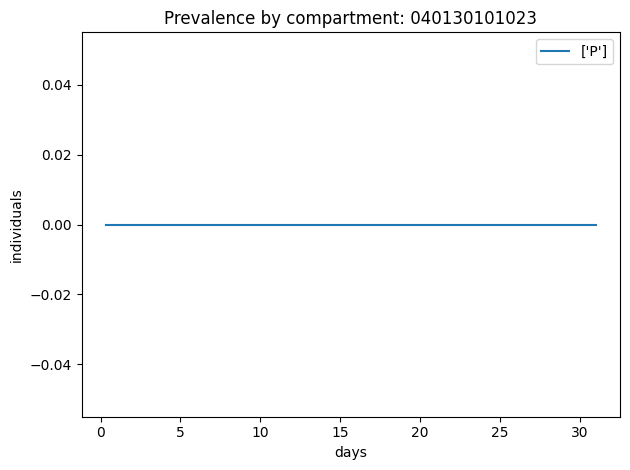

In [38]:
days = 31
sim = StandardSimulation(
    geo=geo_library["movement_geo"](),
    ipm=ipm_library["no"](),
    mm=mm_library["centroids"](),
    params={"phi": 10, "phi_weekend": 20, "move_control": 0.1, "theta": 0.2, "phi": 40},
    time_frame=TimeFrame.of("2019-07-20", days),
    initializer=partial(single_location, location=0, seed_size=0),
    rng=lambda: np.random.default_rng(seed=1),
)

with sim_messaging(sim):
    output = sim.run()
plot_pop(output, pop_idx=5)

single_simulation_out = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/Simulation_runs/movement_geo.csv"
save_csv(path=single_simulation_out, out=output)

In [40]:
model_data = pd.read_csv(single_simulation_out, low_memory=False)
labels = pd.DataFrame(geo_df["label"])

model_column = "c0"
infected_rate_model_data = model_data[[model_column]]

result_df = []
nodes = 2494

# Create an empty DataFrame to hold the results
model_df = pd.DataFrame()

# Loop to create new DataFrames and concatenate them
for i in range(days * 2):
    start_idx = i * nodes
    end_idx = (i + 1) * nodes
    result_group = (
        infected_rate_model_data[model_column]
        .iloc[start_idx:end_idx]
        .reset_index(drop=True)
    )
    column_name = f"day {i + 1}"  # Compute column header based on the iteration
    result_group.rename(column_name, inplace=True)
    model_df = pd.concat([model_df, result_group], axis=1)

# Combine every two columns together
combined_df = pd.DataFrame()
for i in range(0, model_df.shape[1], 2):
    combined_column = model_df.iloc[:, i : i + 3].sum(axis=1)
    combined_df[f"day {i // 3 + 1}"] = combined_column

combined_df_labels = pd.concat([labels, model_df], axis=1)
combined_df_labels

,label,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 53,day 54,day 55,day 56,day 57,day 58,day 59,day 60,day 61,day 62
0,040130101011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,040130101012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,040130101013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,040130101021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,040130101022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,040139413001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2490,040139413002,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2491,040139413003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,040139413004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


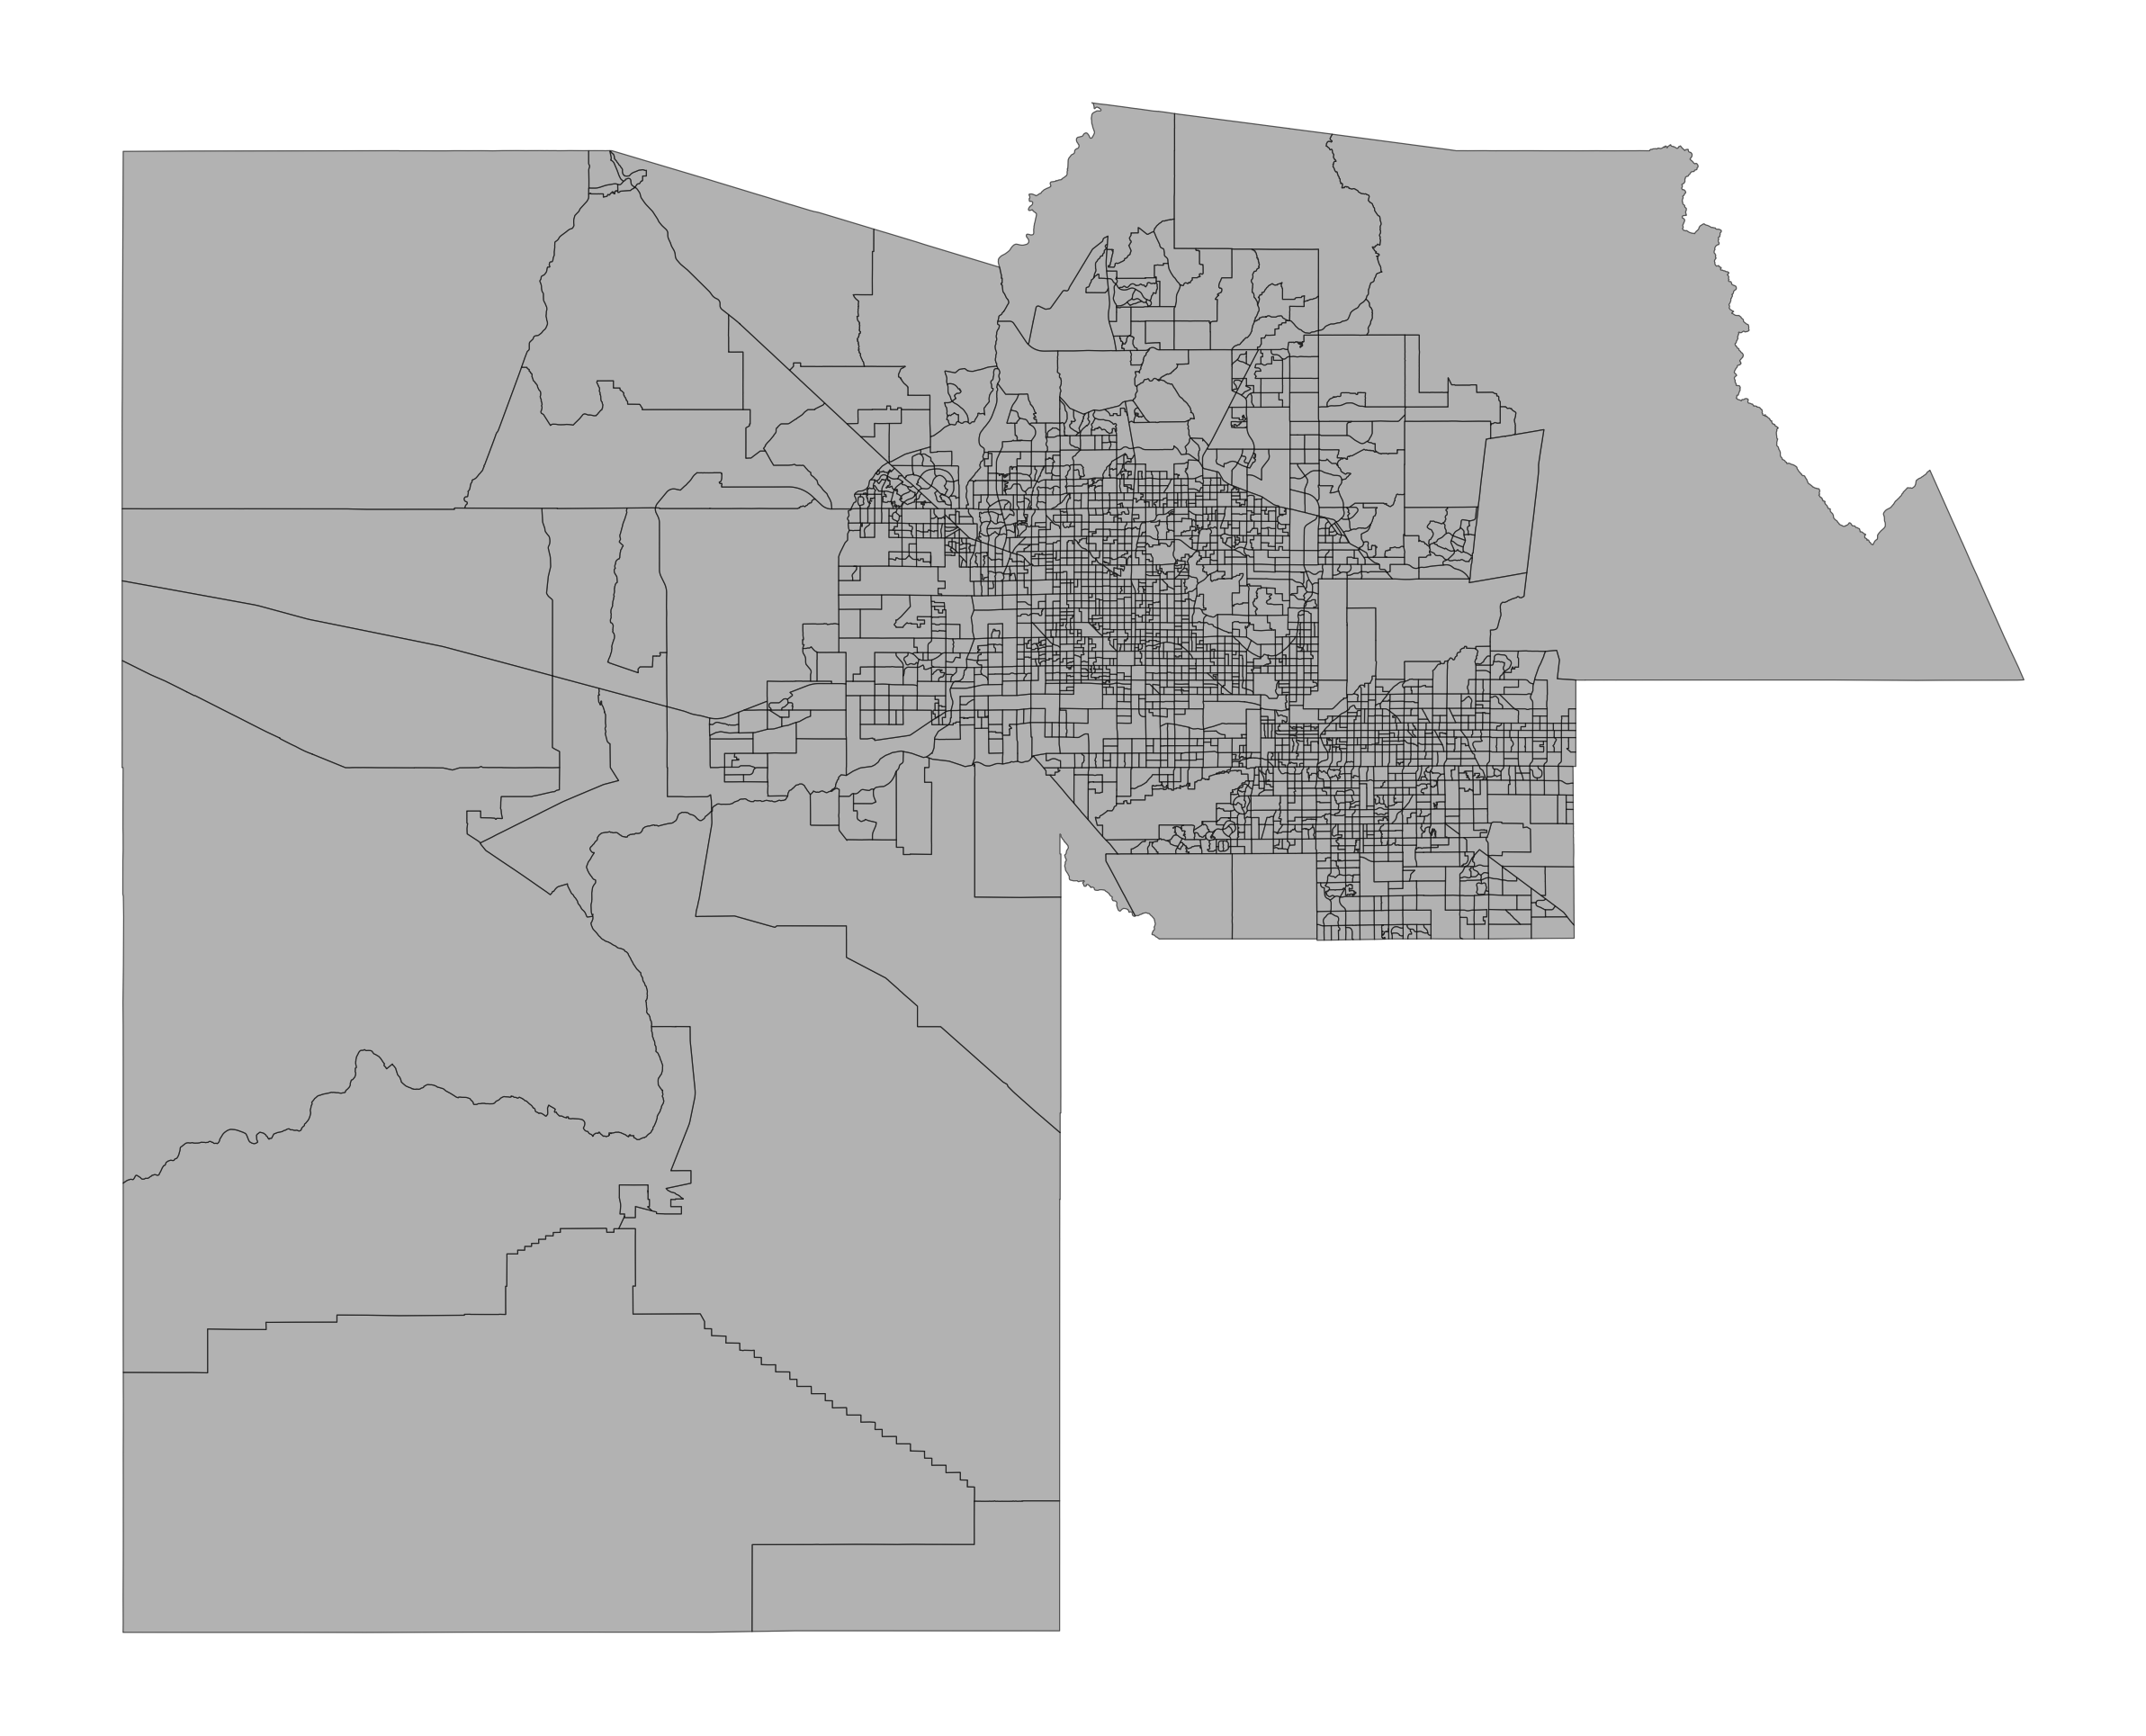

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

census_block_groups.plot(
    linewidth=0.3, ax=ax, edgecolor="black", color="grey", alpha=0.6
)


ax.axis("off")
plt.show()

In [42]:
# Assuming combined_df_labels is your DataFrame and it includes a 'label' column

# Select columns to scale (excluding the 'label' column if it exists)
columns_to_scale = combined_df_labels.columns.difference(["label"])

# Apply Min-Max scaling
for col in columns_to_scale:
    min_col = combined_df_labels[col].min()
    max_col = combined_df_labels[col].max()
    combined_df_labels[col] = (combined_df_labels[col] - min_col) / (max_col - min_col)

# Now combined_df_labels contains the scaled data alongside the unchanged 'label' column
combined_df_labels.head()


,label,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 53,day 54,day 55,day 56,day 57,day 58,day 59,day 60,day 61,day 62
0,040130101011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,040130101012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,040130101013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040130101021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,040130101022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
day_columns = [f"day {i}" for i in range(1, 31)]  # Create a list of day column names


In [44]:
max_value = (
    combined_df_labels[day_columns].max().max()
)  # This selects only the "day" columns for the max calculation

max_value

1.0

In [45]:
merged_df = pd.merge(
    census_block_groups,
    combined_df_labels,
    left_on="GEOID",
    right_on="label",
    how="inner",
)

gpd_df = gpd.GeoDataFrame(merged_df)

In [28]:
gpd_df

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,day 53,day 54,day 55,day 56,day 57,day 58,day 59,day 60,day 61,day 62
0,04,013,421702,3,040134217023,Block Group 3,G5030,S,310375,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,04,013,040531,2,040130405312,Block Group 2,G5030,S,616061,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,04,013,092312,1,040130923121,Block Group 1,G5030,S,295623,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002062,0.0
3,04,013,092721,1,040130927211,Block Group 1,G5030,S,1108648,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,04,013,093104,1,040130931041,Block Group 1,G5030,S,168697,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,04,013,811900,2,040138119002,Block Group 2,G5030,S,771839,0,...,0.004124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2490,04,013,812000,1,040138120001,Block Group 1,G5030,S,1279036,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2491,04,013,812000,2,040138120002,Block Group 2,G5030,S,1360898,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2492,04,013,523002,3,040135230023,Block Group 3,G5030,S,666349,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [32]:
columns_to_animate = ["day " + str(day) for day in range(1, 63)]
columns_to_animate

['day 1',
 'day 2',
 'day 3',
 'day 4',
 'day 5',
 'day 6',
 'day 7',
 'day 8',
 'day 9',
 'day 10',
 'day 11',
 'day 12',
 'day 13',
 'day 14',
 'day 15',
 'day 16',
 'day 17',
 'day 18',
 'day 19',
 'day 20',
 'day 21',
 'day 22',
 'day 23',
 'day 24',
 'day 25',
 'day 26',
 'day 27',
 'day 28',
 'day 29',
 'day 30',
 'day 31',
 'day 32',
 'day 33',
 'day 34',
 'day 35',
 'day 36',
 'day 37',
 'day 38',
 'day 39',
 'day 40',
 'day 41',
 'day 42',
 'day 43',
 'day 44',
 'day 45',
 'day 46',
 'day 47',
 'day 48',
 'day 49',
 'day 50',
 'day 51',
 'day 52',
 'day 53',
 'day 54',
 'day 55',
 'day 56',
 'day 57',
 'day 58',
 'day 59',
 'day 60',
 'day 61',
 'day 62']

In [46]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import geopandas as gpd

dpi = 300
columns_to_animate = ["day " + str(day) for day in range(1, 63)]

# Create a list to store frames
frames = []

# Temporary directory to store image files
temp_dir = "temp_images"
os.makedirs(temp_dir, exist_ok=True)

# Loop through the columns and create a frame for each day

ids = 0
for column in columns_to_animate:
    fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10), dpi=dpi)

    census_block_groups.plot(ax=ax1, color="gray")
    gpd_df.plot(
        column=column,
        cmap="viridis",
        vmin=0,
        vmax=1,
        linewidth=0.1,
        edgecolor="black",
        ax=ax1,
    )

    ax1.set_title(f"Movers on tau tick {column[4:]}")  # Set the title for each frame
    ax1.axis("off")

    # Save the frame as an image in the temporary directory
    img_file = os.path.join(temp_dir, f"day_{column[4:]}.png")
    plt.savefig(img_file, dpi=dpi, bbox_inches="tight")
    plt.close(fig)

    # Open and append the image to the frames list
    frames.append(Image.open(img_file))

# Save frames as a GIF
gif_filename = "Movers.gif"
frames[0].save(
    gif_filename,
    save_all=True,
    append_images=frames[1:],
    duration=400,  # Time between frames in milliseconds
    loop=0,  # 0 means infinite loop
)

# Clean up temporary image files
for img_file in os.listdir(temp_dir):
    file_path = os.path.join(temp_dir, img_file)
    os.remove(file_path)

# Remove the temporary directory
os.rmdir(temp_dir)

print(f"GIF saved as {gif_filename}")

GIF saved as Movers.gif


In [12]:
census_block_groups

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,013,421702,3,040134217023,Block Group 3,G5030,S,310375,0,+33.4123043,-111.7788867,"POLYGON ((-111.78406 33.41540, -111.78259 33.4..."
1,04,013,040531,2,040130405312,Block Group 2,G5030,S,616061,0,+33.6422660,-112.3722104,"POLYGON ((-112.37679 33.64389, -112.37673 33.6..."
2,04,013,092312,1,040130923121,Block Group 1,G5030,S,295623,0,+33.5654583,-112.1989360,"POLYGON ((-112.20294 33.56672, -112.20293 33.5..."
5,04,013,092721,1,040130927211,Block Group 1,G5030,S,1108648,0,+33.5408739,-112.2472748,"POLYGON ((-112.25507 33.53763, -112.25507 33.5..."
6,04,013,093104,1,040130931041,Block Group 1,G5030,S,168697,0,+33.5113085,-112.1797305,"POLYGON ((-112.18194 33.50955, -112.18193 33.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,04,013,811900,2,040138119002,Block Group 2,G5030,S,771839,0,+33.2801026,-111.8638617,"POLYGON ((-111.87111 33.28352, -111.87031 33.2..."
4140,04,013,812000,1,040138120001,Block Group 1,G5030,S,1279036,0,+33.2802159,-111.8501034,"POLYGON ((-111.85867 33.28374, -111.85848 33.2..."
4141,04,013,812000,2,040138120002,Block Group 2,G5030,S,1360898,0,+33.2876864,-111.8502128,"POLYGON ((-111.85885 33.29153, -111.85853 33.2..."
4176,04,013,523002,3,040135230023,Block Group 3,G5030,S,666349,0,+33.3097028,-111.8546715,"POLYGON ((-111.85910 33.30737, -111.85908 33.3..."


In [13]:
import pandas as pd

# Assuming census_block_groups is your existing DataFrame
# Ensure the latitude and longitude columns are in float format
census_block_groups["INTPTLAT"] = pd.to_numeric(
    census_block_groups["INTPTLAT"], errors="coerce"
)
census_block_groups["INTPTLON"] = pd.to_numeric(
    census_block_groups["INTPTLON"], errors="coerce"
)

# Create the 'centroid' column by combining 'INTPTLON' and 'INTPTLAT' into a tuple
census_block_groups["centroid"] = census_block_groups.apply(
    lambda row: (row["INTPTLON"], row["INTPTLAT"]), axis=1
)

# Now, census_block_groups has a new column 'centroid' with the desired tuple format
census_block_groups

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,centroid
0,04,013,421702,3,040134217023,Block Group 3,G5030,S,310375,0,33.412304,-111.778887,"POLYGON ((-111.78406 33.41540, -111.78259 33.4...","(-111.7788867, 33.4123043)"
1,04,013,040531,2,040130405312,Block Group 2,G5030,S,616061,0,33.642266,-112.372210,"POLYGON ((-112.37679 33.64389, -112.37673 33.6...","(-112.3722104, 33.642266)"
2,04,013,092312,1,040130923121,Block Group 1,G5030,S,295623,0,33.565458,-112.198936,"POLYGON ((-112.20294 33.56672, -112.20293 33.5...","(-112.198936, 33.5654583)"
5,04,013,092721,1,040130927211,Block Group 1,G5030,S,1108648,0,33.540874,-112.247275,"POLYGON ((-112.25507 33.53763, -112.25507 33.5...","(-112.2472748, 33.5408739)"
6,04,013,093104,1,040130931041,Block Group 1,G5030,S,168697,0,33.511308,-112.179731,"POLYGON ((-112.18194 33.50955, -112.18193 33.5...","(-112.1797305, 33.5113085)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,04,013,811900,2,040138119002,Block Group 2,G5030,S,771839,0,33.280103,-111.863862,"POLYGON ((-111.87111 33.28352, -111.87031 33.2...","(-111.8638617, 33.2801026)"
4140,04,013,812000,1,040138120001,Block Group 1,G5030,S,1279036,0,33.280216,-111.850103,"POLYGON ((-111.85867 33.28374, -111.85848 33.2...","(-111.8501034, 33.2802159)"
4141,04,013,812000,2,040138120002,Block Group 2,G5030,S,1360898,0,33.287686,-111.850213,"POLYGON ((-111.85885 33.29153, -111.85853 33.2...","(-111.8502128, 33.2876864)"
4176,04,013,523002,3,040135230023,Block Group 3,G5030,S,666349,0,33.309703,-111.854671,"POLYGON ((-111.85910 33.30737, -111.85908 33.3...","(-111.8546715, 33.3097028)"


In [15]:
def haversine(
    centroid_1_lon: float,
    centroid_1_lat: float,
    centroid_2_lon: float,
    centroid_2_lat: float,
) -> np.double:
    R = 3959.87433
    dLat = np.radians(centroid_1_lat - centroid_2_lat)
    dLon = np.radians(centroid_1_lon - centroid_2_lon)
    lat1 = np.radians(centroid_1_lat)
    lat2 = np.radians(centroid_2_lat)

    a = np.sin(dLat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [16]:
import numpy as np
import pandas as pd


def calculate_phi_values(census_block_groups):
    num_labels = len(census_block_groups["GEOID"])
    distances = np.zeros((num_labels, num_labels))

    # Calculate distances using the haversine formula
    for i in range(num_labels):
        for j in range(num_labels):
            if i != j:
                centroid_i = census_block_groups["centroid"].iloc[
                    i
                ]  # Modified to use .iloc
                centroid_j = census_block_groups["centroid"].iloc[
                    j
                ]  # Modified to use .iloc
                distances[i, j] = haversine(
                    centroid_i[0], centroid_i[1], centroid_j[0], centroid_j[1]
                )

    # Determine distance categories
    short_distance_indices = distances <= 10
    medium_distance_indices = (distances > 10) & (distances < 100)
    long_distance_indices = distances >= 100

    # Initialize phi matrices with ones, then adjust according to distance
    phi_values = np.ones_like(distances)

    # Adjust phi values based on the distance category
    # These factors and adjustments can be customized as needed
    phi_values[short_distance_indices] = 1 / np.exp(
        distances[short_distance_indices] * (1 / 10)
    )
    phi_values[medium_distance_indices] = 1 / np.exp(
        distances[medium_distance_indices] * (1 / 30)
    )  # Adjusted for medium distances
    phi_values[long_distance_indices] = 1 / np.exp(
        distances[long_distance_indices] * (1 / 30)
    )  # Assuming further adjustment for long distances

    # Convert distances and phi values to pandas DataFrames
    dist_df = pd.DataFrame(distances)
    phi_df = pd.DataFrame(phi_values)

    # Example: Select data for a specific census block group
    p_cbg = 1715
    selected_distances = dist_df.iloc[:, p_cbg]
    selected_phi_values = phi_df.iloc[:, p_cbg]

    # Concatenate distances and phi values into a single DataFrame
    cgb = pd.concat([selected_distances, selected_phi_values], axis=1)
    cgb.columns = ["distance", "phi_value"]

    return cgb


# Assume 'census_block_groups' is a predefined DataFrame with the necessary data
# haversine function needs to be defined or imported to calculate distances
cgb = calculate_phi_values(census_block_groups)

In [19]:
num_labels = len(census_block_groups["GEOID"])
distances = np.zeros((num_labels, num_labels))
phi_values = np.zeros((num_labels, num_labels))

for i in range(num_labels):
    for j in range(num_labels):
        if i != j:
            # Accessing centroid values safely
            centroid_i = census_block_groups["centroid"].iloc[
                i
            ]  # Modified to use .iloc
            centroid_j = census_block_groups["centroid"].iloc[
                j
            ]  # Modified to use .iloc
            distances[i, j] = haversine(
                centroid_i[0], centroid_i[1], centroid_j[0], centroid_j[1]
            )

phi_10 = 1 / np.exp(distances * (1 / 10))
phi_20 = 1 / np.exp(distances * (1 / 20))
phi_30 = 1 / np.exp(distances * (1 / 30))
phi_40 = 1 / np.exp(distances * (1 / 40))
phi_50 = 1 / np.exp(distances * (1 / 50))

# Save phi and distances as CSV
phi_10_df = pd.DataFrame(phi_10)
phi_20_df = pd.DataFrame(phi_20)
phi_30_df = pd.DataFrame(phi_30)
phi_40_df = pd.DataFrame(phi_40)
phi_50_df = pd.DataFrame(phi_50)
dist_df = pd.DataFrame(distances)
p_cbg = 540
cgb_d = dist_df.iloc[:, p_cbg]
cgb_10 = phi_10_df.iloc[:, p_cbg]
cgb_20 = phi_20_df.iloc[:, p_cbg]
cgb_30 = phi_30_df.iloc[:, p_cbg]
cgb_40 = phi_40_df.iloc[:, p_cbg]
cgb_50 = phi_50_df.iloc[:, p_cbg]

cgb = pd.concat([cgb_d, cgb_10, cgb_20, cgb_30, cgb_40, cgb_50], axis=1)

cgb.columns = ["distance", "phi 10", "phi 20", "phi 30", "phi 40", "phi 50"]
cgb

,distance,phi 10,phi 20,phi 30,phi 40,phi 50
0,27.080452,0.066667,0.258200,0.405481,0.508133,0.581811
1,13.713095,0.253774,0.503760,0.633115,0.709761,0.760133
2,6.664768,0.513515,0.716599,0.800788,0.846522,0.875207
3,4.491017,0.638201,0.798875,0.860966,0.893798,0.914095
4,4.349178,0.647318,0.804561,0.865046,0.896973,0.916692
...,...,...,...,...,...,...
2500,25.693861,0.076583,0.276736,0.424662,0.526057,0.598172
2501,26.367963,0.071590,0.267564,0.415226,0.517265,0.590161
2502,26.100417,0.073531,0.271167,0.418946,0.520737,0.593328
2503,25.144202,0.080910,0.284446,0.432514,0.533335,0.604784


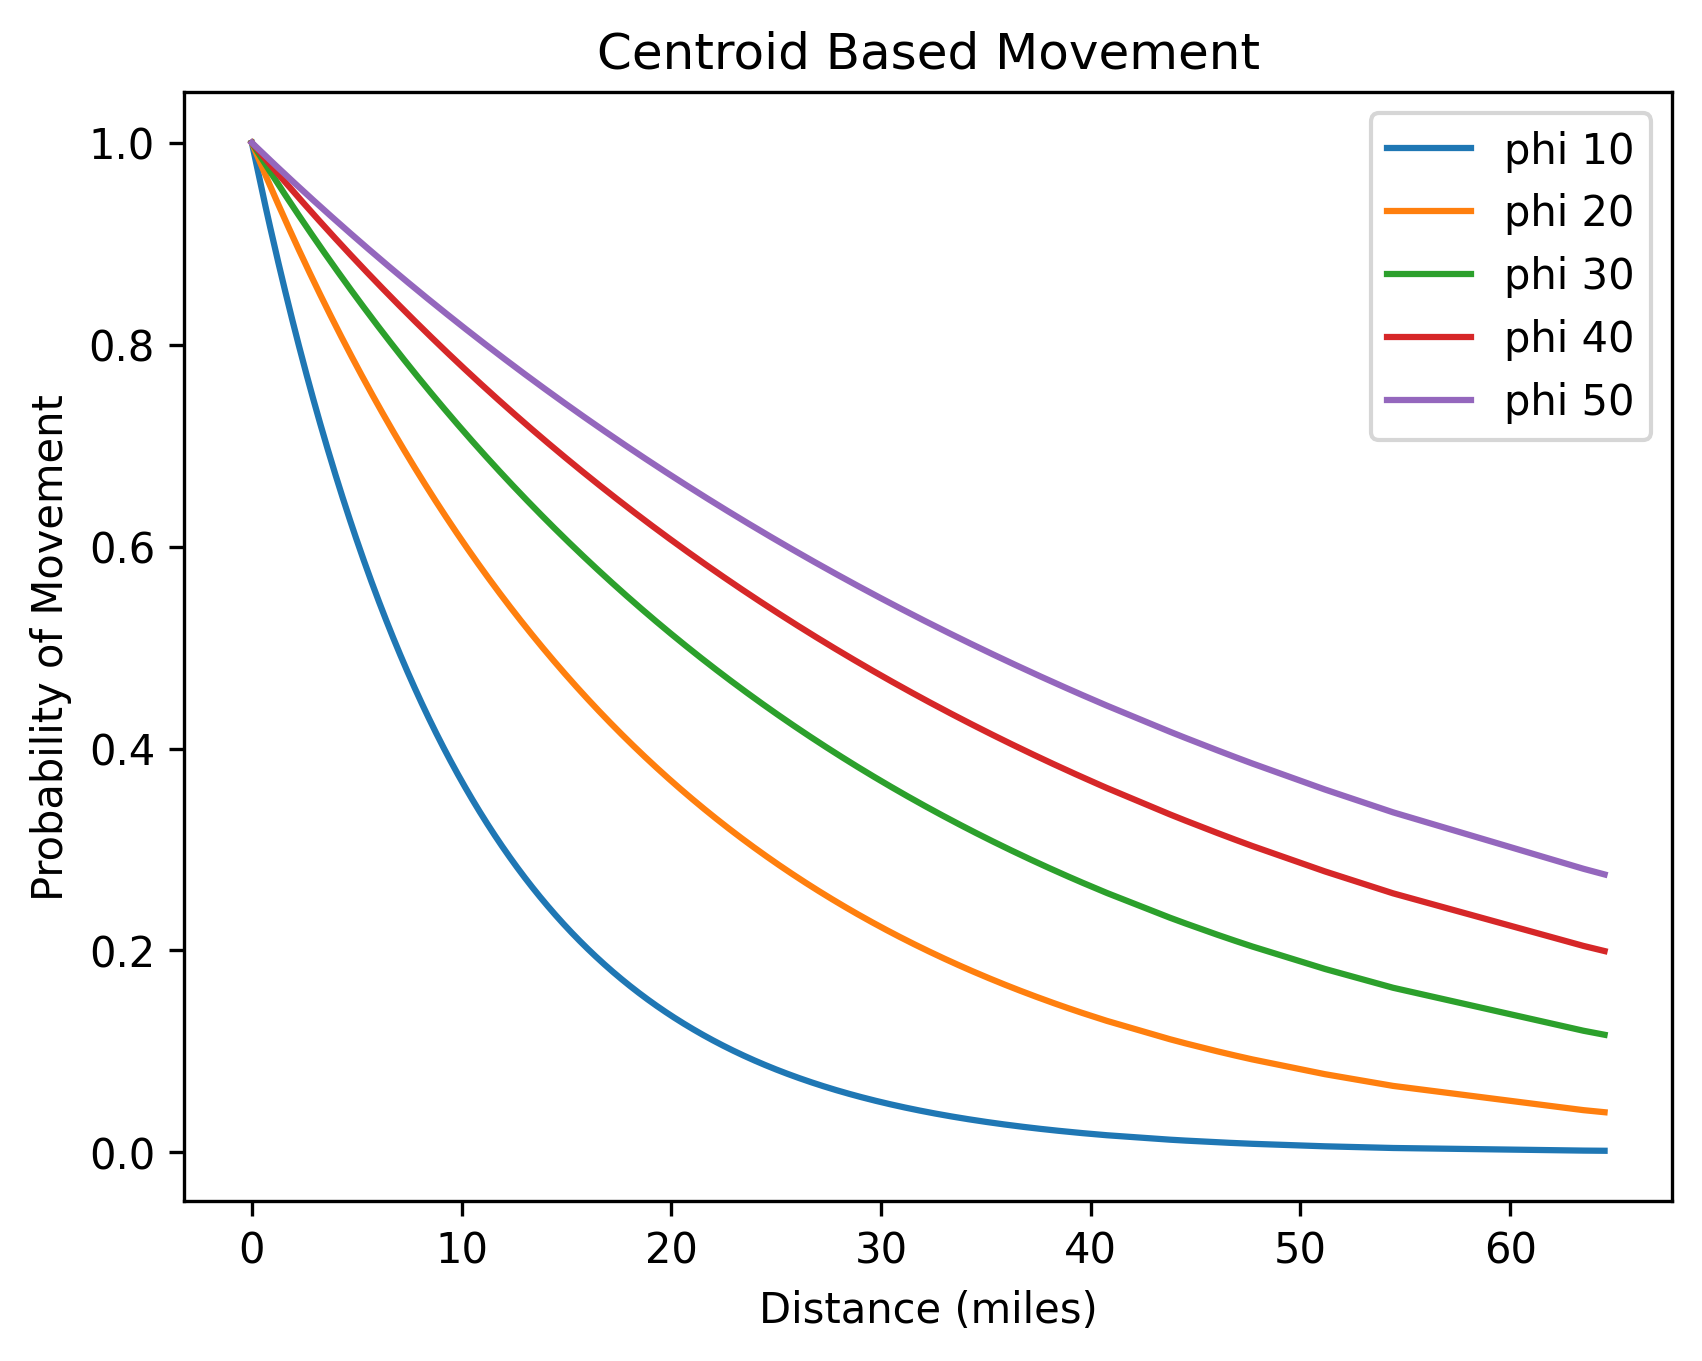

In [23]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)

# Sort the DataFrame by the 'distance' column
cgb_sorted = cgb.sort_values(by="distance")

# Extracting the sorted columns
distance_sorted = cgb_sorted["distance"]
phis = ["phi 10", "phi 20", "phi 30", "phi 40", "phi 50"]

# Plotting
for phi in phis:
    plt.plot(distance_sorted, cgb_sorted[phi], label=phi)

# Adding labels and title
plt.xlabel("Distance (miles)")
plt.ylabel("Probability of Movement")
plt.title("Centroid Based Movement")  # Updated title
plt.legend()
plt.show()
